# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


____
** Import numpy and pandas **

In [2]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

** Read in the csv file as a dataframe called df **

In [4]:
df = pd.read_csv('911.csv')

** Check the info() of the df **

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**  finding the top 5 zipcodes for 911 calls **

In [7]:
df['zip'].value_counts().head()

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

** top 5 townships (twp) for 911 calls? **

In [8]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

** Finding the  umber of unique title codes in the title column **

In [9]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Using .apply() with a custom lambda expression to create a new column called "reason" that contains this string value.** 


In [10]:
df['reason']=df['title'].apply(lambda title:title.split(':')[0])

** most common reason for a 911 call based off of this new column **

In [11]:
df['reason'].value_counts()

reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

** creating a countplot of 911 calls by reason. **

/var/folders/_g/97fwhh3n70j0mm1lzj_0jg2r0000gn/T/ipykernel_1641/3959786371.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x='reason',palette='viridis')


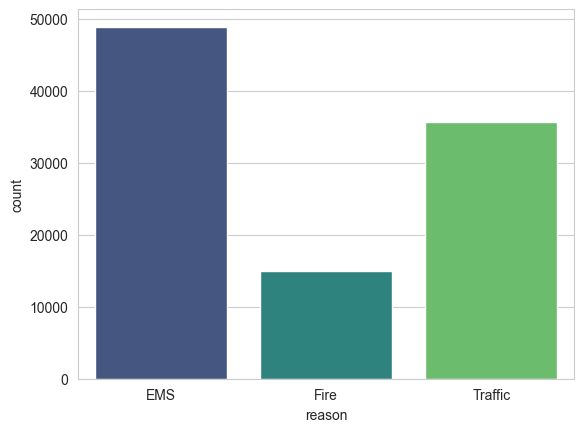

In [12]:
sns.countplot(df,x='reason',palette='viridis')
plt.show()

___
** data type of the objects in the timeStamp column? **

In [13]:
type('TimeStamp')

str

** Use [pd.to_datetime] to convert the column from strings to DateTime objects. **

In [14]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


** break out the time stamp into hours days and months **

In [15]:
df['hour']=df['timeStamp'].apply(lambda time:time.hour)
df['month']=df['timeStamp'].apply(lambda time:time.month)
df['day of week']=df['timeStamp'].apply(lambda time:time.dayofweek)

** map the days of the week to their string names **


In [16]:
dmap={0:'Mon',1:'Tues',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day of week']=df['day of week'].map(dmap)

** plot out the type of 911 call by the day of the week **

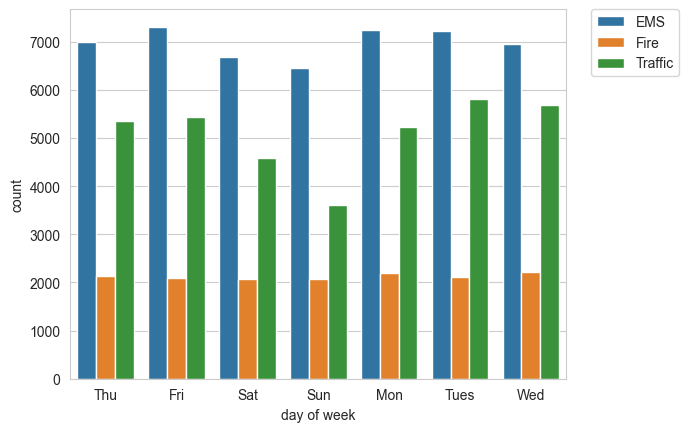

In [17]:
sns.countplot(df,x='day of week',hue='reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

EMS has the highest volume of calls regardless of week closely
followed by Traffic calls. Fires are very consistent throughout the week.

**plotting month**

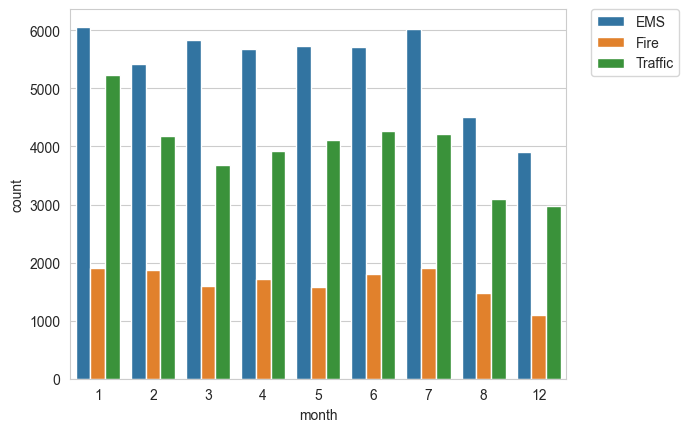

In [18]:
sns.countplot(df,x='month',hue='reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Again, we get roughly the same outcome. We can see that some
months are missing. A line plot might help fill in this information

** create a groupby object called byMonth, where we group the DataFrame by the month column and use the count() method for aggregation. **

In [19]:
byMonth = df.groupby('month').count()
byMonth.head(15)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


** create a simple plot off of the dataframe indicating the count of calls per month. **

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


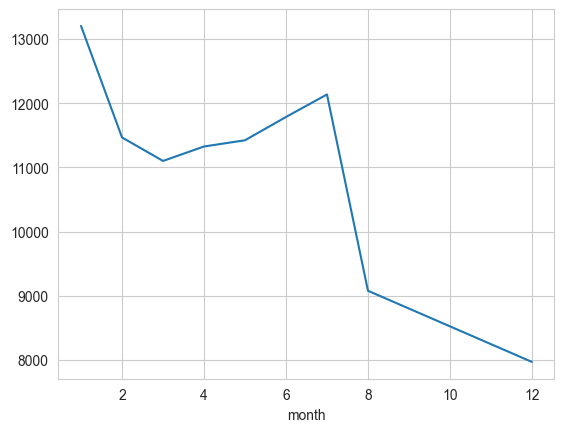

In [20]:
byMonth['lat'].plot()
byMonth.head()

This graph tells us that the most calls were made in January with a spike in the
downward trend around July. Notice that the y-axis starts at 8000 so there are still a
large amount of calls even though the graph suggests a large drop. We will need to set the
index to a column to create a linear fit on the number of calls per month. Again, any
column will work for "y" to get the number of calls

** We use seaborn's lmplot() to create a linear fit on the number of calls per month.  **

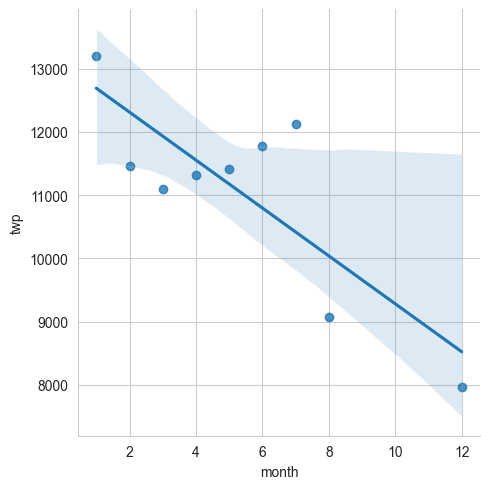

In [21]:
#To plot the number of calls per month, we need a month column in the byMonth dataframe(month is an index in the dataframe), 
#where we have stored the counts of calls based on all attributes.
byMonth.reset_index() #now month is a column
sns.lmplot(x='month',y='twp',data=byMonth.reset_index())

This plot shows that the trend is down with the outliers being in the month of july where we saw a peak in calls.

**Lets take a look of calls by date ** 

In [22]:
df['date']=df['timeStamp'].apply(lambda t:t.date())
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


** groupby  Date column with the count() aggregate and create a plot of counts of 911 calls.**

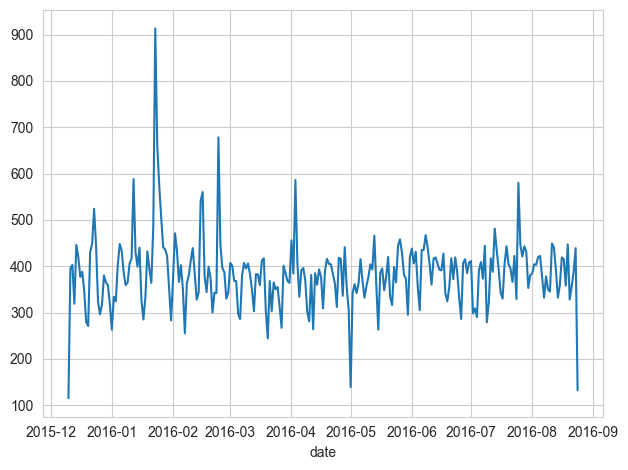

In [23]:
df.groupby('date').count()['twp'].plot()
plt.tight_layout()

** recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [24]:
#grouping by date  but counting values for all columns
df[df['reason']=='Fire'].groupby('date').count()
##grouping by date  but counting values for twp column
df[df['reason']=='Fire'].groupby('date').count()['twp']


date
2015-12-10    15
2015-12-11    68
2015-12-12    68
2015-12-13    51
2015-12-14    38
              ..
2016-08-20    52
2016-08-21    54
2016-08-22    50
2016-08-23    70
2016-08-24    19
Name: twp, Length: 259, dtype: int64

In [25]:
# df[df['reason']=='Fire']
#Finding out how many reasons are there
df.reason.unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

Text(0.5, 1.0, 'EMS')

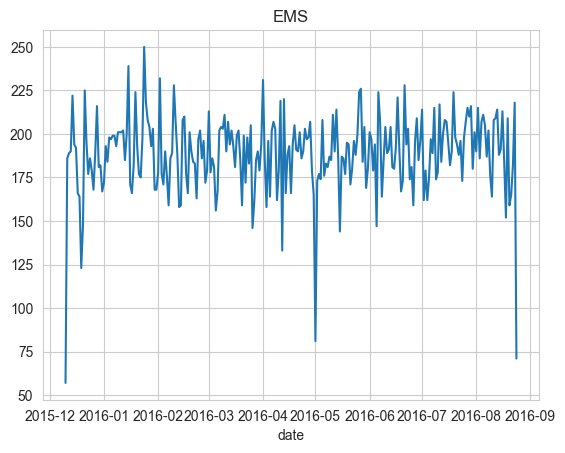

In [26]:
df[df['reason']=='EMS'].groupby('date').count()['twp'].plot()
plt.title('EMS')


EMS seems to be fairly consistent throughout the year with few spikes

Text(0.5, 1.0, 'Fire')

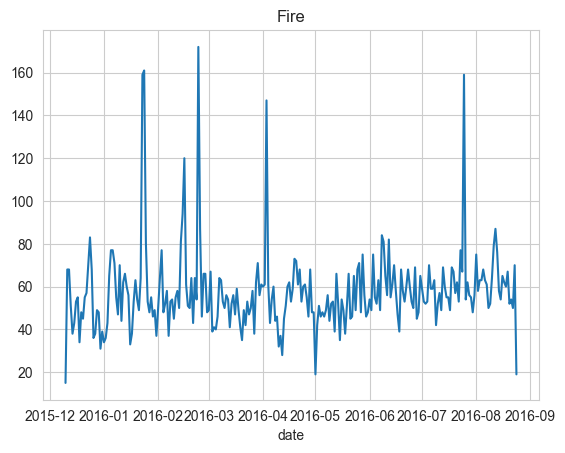

In [27]:
df[df['reason']=='Fire'].groupby('date').count()['twp'].plot()
plt.title('Fire')


I would have expected more fire calls to be during the summer months, and although
we see a spike around July, we know july to be a high volumne month. This graph
suggests more incidents in the winter.

Text(0.5, 1.0, 'Traffic')

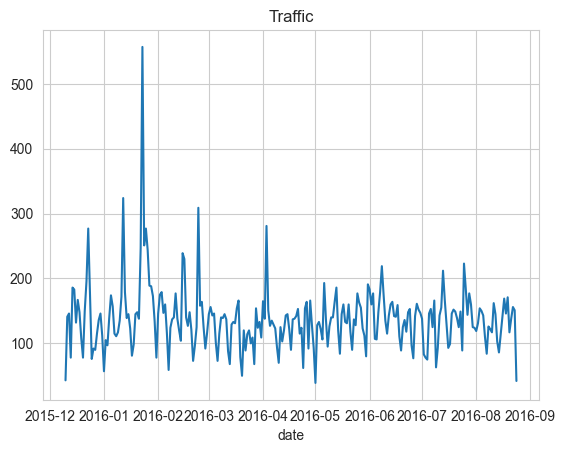

In [28]:
df[df['reason']=='Traffic'].groupby('date').count()['twp'].plot()
plt.title('Traffic')


The graph above suggest there are more traffic incidents reported in the winter
months which makes sense with driving conditions being at their worst.

____
** A heatmap could be useful to determine what time of day most 911 calls were made. I'll
first have to arrange the data frame into a matrix**

In [29]:
#The pivot function is used to create a new derived table from the given data frame object “df”.
#The function takes three arguments; index, columns, and values. 
#The cell values of the new table are taken from the column given as the values parameter
dayHour = df.groupby(['day of week','hour'])['reason'].count().unstack()
dayHour.head(10)

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tues,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<Axes: xlabel='hour', ylabel='day of week'>

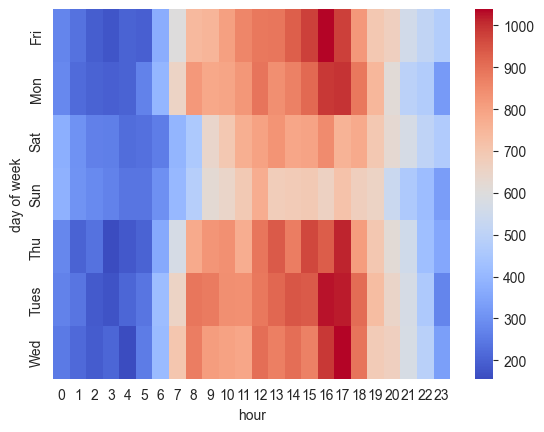

In [30]:
sns.heatmap(dayHour,cmap='coolwarm')

This shows that most calls are made between 7am and 7pm. The highest volume of calls
are made around 4 or 5pm on nearly every day of the week.Weekend has the lowest volume of calls.

** Now create a clustermap using this DataFrame. **

In [107]:
pip install scipy


  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/71/ba/744bbdd65eb3fce1412dd4633fc425ad39e6b4068b5b158aee1cd3afeb54/scipy-1.12.0-cp312-cp312-macosx_12_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.9/217.9 kB 2.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 6.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


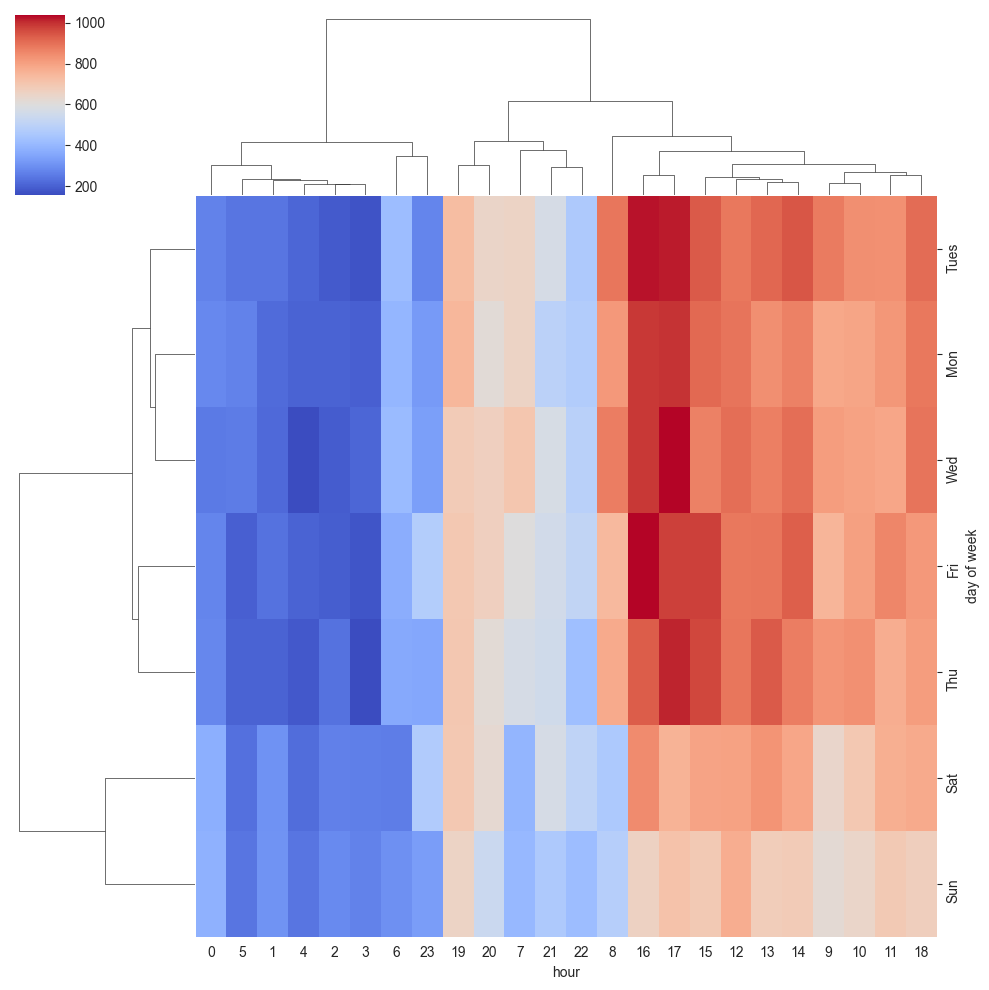

In [31]:
import scipy
sns.clustermap(dayHour, cmap='coolwarm')

This cluster map suggests what was determined from the last graph. The weekend days are
grouped together showing they have the lowest volume and the normal sleeping hours
are to the left of the x-axis showing 911 calls were less likely to be made then.

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [33]:
dayMonth = df.groupby(['day of week','month'])['reason'].count().unstack()
dayMonth.head(10)

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tues,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<Axes: xlabel='month', ylabel='day of week'>

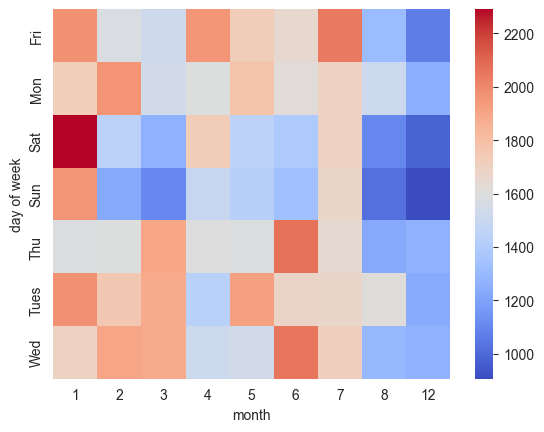

In [34]:
sns.heatmap(dayMonth, cmap='coolwarm')

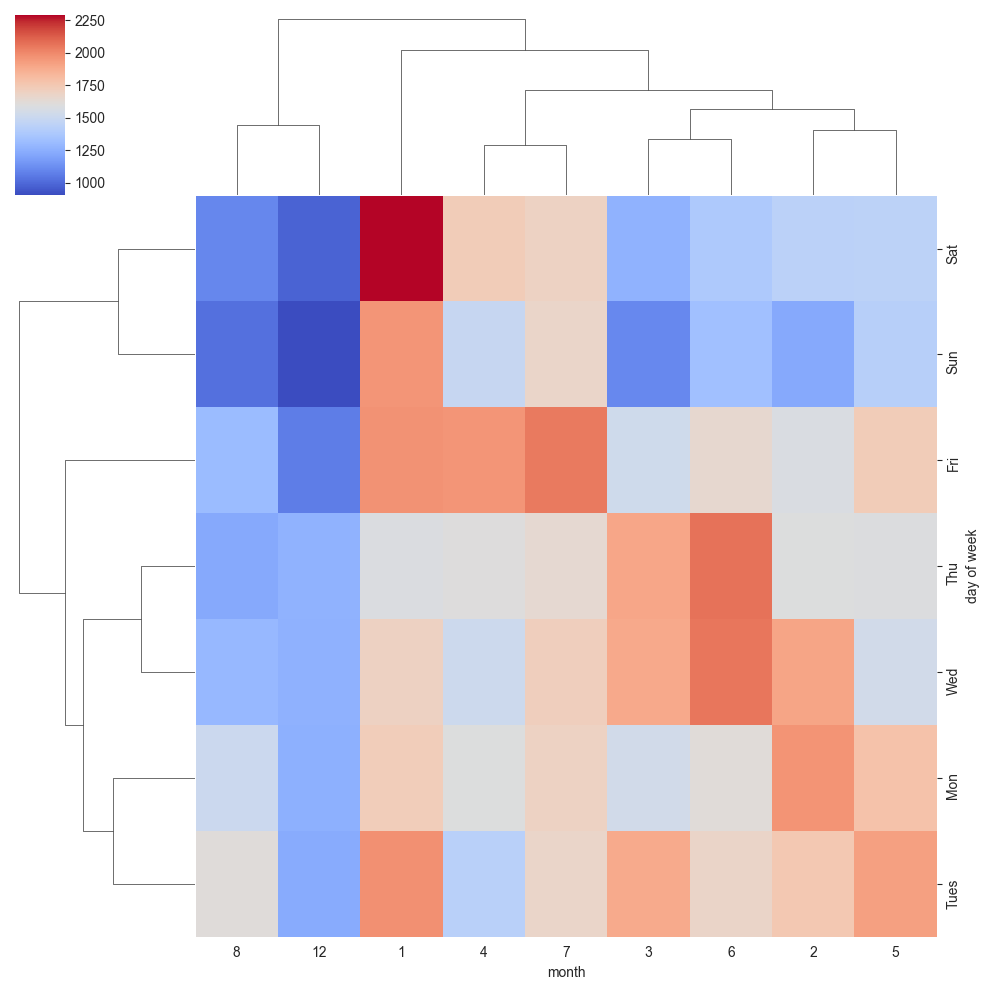

In [35]:
sns.clustermap(dayMonth, cmap='coolwarm')

We can see that saturdays in January had the highest volume of calls despite the
weekend having the lowest amount of 911 calls. We can also summize that the summer
months had the lowest volume of calls.